In [1]:
# Fill in your name using the format below and student ID number
group_id = "5"
team_member_1 = "Matoba, Camila, 2067717"
team_member_2 = "Eekelaar, Thijs, 2027144"
team_member_3 = "Ustunboyacioglu, Ipek, 2064716"
team_member_4 = "Rass, Andrey, 2077201"
team_member_5 = "Gomes Branco, Gabriella, 1005168"
team_member_6 = "Heideman, Tim, 2087854"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = False

In [3]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

# Uncomment the following line to run in Google Colab to install OpenML
#!pip install --quiet openml

# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructions below.
#import tensorflow as tf
#tf.config.experimental.list_physical_devices('GPU') 

%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Uncomment to use OpenML caching with your Google Drive. After longer periods of inactivity, your Colab VM may be recycled, 
# in which case the dataset will have to be downloaded again. To avoid this, use the code below to let OpenML cache the dataset 
# on your Google Drive.
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/drive/MyDrive/cache')

In [4]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

Did you ever wonder how Google Maps can locate specific house numbers? We'll find out using imagery from Google Streetview. 

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * E.g. '/content/drive/My Drive/Assignment3' if you don't change it

In [5]:
# Making directory for the output:
if not os.path.exists('D:/GitHub/master/assignments/output'):
    os.makedirs('D:/GitHub/master/assignments/output')
    
base_dir = 'D:/GitHub/master/assignments/output'
#base_dir = './'

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* You should submit your notebook, but also a PDF and a link to all stored models. One way to do this is to upload them to GitHub.
* Ideally, your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to check that all the results are included in the notebook. Also upload a PDF (e.g. by printing to PDF) with all results as a backup.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit. [Read more about this dataset here](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/37648.pdf).

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. 

Also note that this dataset is about 1Gb large, and parsing it will take even more space in memory. You may need to switch to a high-RAM environment (only in Colab pro). As a workaround, we've hosted the pre-loaded OpenML version of this dataset and provided code to download it below - uncomment it if you prefer to use this.

In [6]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
#SVHN = oml.datasets.get_dataset(41081)
#X, y, _, _ = SVHN.get_data(dataset_format='array',
#    target=SVHN.default_target_attribute)

In [7]:
# Backup solution to download the dataset file from
# File: "https://drive.google.com/file/d/1zZRRe3ffmuAf1x4yZmYwG_rLiuggep2A/view?usp=sharing"
# Saved locally in the same folder as this notebook
import pickle

with open("dataset.pkl.py3", "rb") as fh:
    data, categorical, attribute_names = pickle.load(fh)
d = data.to_numpy(dtype='int')
X, y = d[:,:-1], d[:,-1]-1

Reshape, sample and split the data

In [8]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [9]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

In [10]:
# Save memory allocation
import gc

del Xr, yr, d
gc.collect()

22

Check the formatting - and what the data looks like

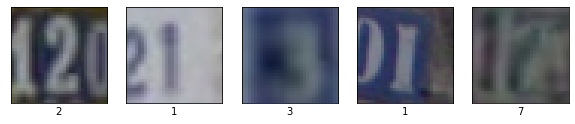

In [11]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [12]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
  """ Prints text in red. Just for fun.
  """
  if verbose>0:
    print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
  return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
  """ Trains and evaluates the given model on the predefined train and test splits,
  stores the trained model and learning curves. Also prints out a summary of the 
  model and plots the learning curves.
  Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
  """
  model = model_builder(**kwargs)
  if not model:
    shout("No model is returned by the model_builder")
    return
  if not hasattr(model, 'fit'):
    shout("Model is not built correctly")
    return
  learning_curves = {}
  if train and not stop_training: # Train anew
    shout("Training the model", verbose)
    if generator:
      generator, X_val, y_val = data
      history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                          steps_per_epoch=steps_per_epoch, verbose=1, 
                          validation_data=(X_val, y_val))
      learning_curves = history.history
    else:
      X_train, X_val, y_train, y_val = data
      history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                          verbose=1, validation_data=(X_val, y_val))
      learning_curves = history.history
    shout("Saving to file", verbose)
    save_model_to_file(model, base_dir, name)
    with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
      pickle.dump(learning_curves, file_pi)
    shout("Model stored in "+base_dir, verbose)
  else: # Load from file
    shout("Loading model from file", verbose)
    model = load_model_from_file(base_dir, name)
    if not model:
      shout("Model not found")
      return
    learning_curves = None
    try:
      learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
    except FileNotFoundError:
      shout("Learning curves not found")
      return
    shout("Success!", verbose)
  # Report
  print(model.summary())
  lc = pd.DataFrame(learning_curves)
  lc.plot(lw=2,style=['b:','r:','b-','r-']);
  plt.xlabel('epochs');
  print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.532457  0.237033  0.

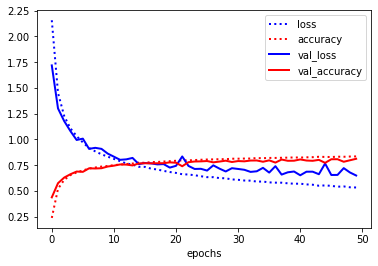

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
import keras
# epochs was set at the maximum allowed (50) to be balanced between being able to converge and not taking a substantial amount of time for training.
epochs = 50

def build_model_1_1():
    learning_rate=0.001
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    
    # Pyramid shaped dense network
    model.add(layers.Dense(units=128, activation='selu'))
    model.add(layers.Dense(units=64, activation='selu'))
    model.add(layers.Dense(units=32, activation='selu'))
    
    # Output layer: the model consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
    model.add(layers.Dense(units=10, activation='softmax'))     
 
    # Loss function for multi-class classification
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

#run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, train=True, epochs=epochs, batch_size=64)
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, train=False)

answer_q_1_1 = """
The output layer has 10 units, because the model consists of 10 classes:
1 for each digit. Digit '1' has label 1, ... and '0' has label 10.
               
Using 3 layers (64,32,10 units) maximum accuracy achieved was 0.624. 
As we want accuracy of at least 0.700, another layer was added, 
so that the model with 4 Dense layers (respectively 128,64,32,10 units) achieved 0.811 accuracy.
Other parameters were changed post-hoc the tuning on question 1.3
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [14]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

def normalize_image(X):
    #image = X.reshape((32, 32))
    return (X - np.min(X))/np.ptp(X) # Normalize

Loading model from file
Success!
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 10)                330       
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.464691  0.341008  0.

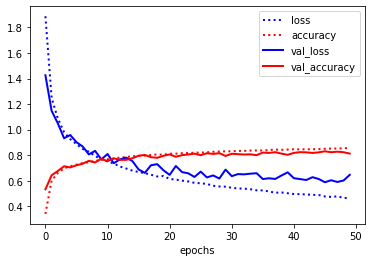

In [15]:
# Replace with the preprocessed data
preprocessed_split = normalize_image(rgb2gray(X_train)), normalize_image(rgb2gray(X_val)), y_train, y_val

# Adjusted model
def build_model_1_2():
    learning_rate=0.001
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    
    # Pyramid shaped dense network
    model.add(layers.Dense(units=128, activation='selu'))
    model.add(layers.Dense(units=64, activation='selu'))
    model.add(layers.Dense(units=32, activation='selu'))
    
    # Output layer: the model consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
    model.add(layers.Dense(units=10, activation='softmax'))     
 
    # Loss function for multi-class classification
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
#run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, train=True, epochs=epochs, batch_size=64)
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, train=False)

answer_q_1_2 = """
Applying the gray scale preprocessing increased the maximum validation accuracy achieved from 0.811 to 0.831.

The only difference between the model builders is that the input is smaller,
since instead of 32*32*3 (for each RGB color) there is only 32*32*1.
That means that for this task (identifying digits from pictures) color is not that important for the model.
There was also less training time needed,
so that doing grayscale conversion on this dataset is highly recommended.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               131200    
_________________________________________________________________
batch_normalization_19 (Batc (None, 128)               512       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)     

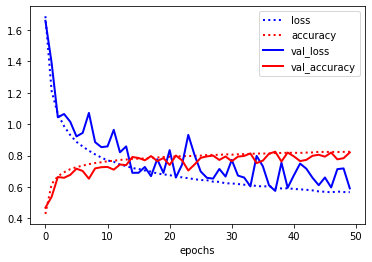

In [16]:
# Some tested parameters/combinations and their maximum validation accuracy (on epochs=25):
# batch size (64) = 16: 0.589; 32: 0.771; 64: 0.783
# learning rate (0.001) = 0.01: 0.753; 0.001: 0.783; 0.0001: 0.782
# optimizers (Adam) = Adam: 0.783; rmsprop: 0.747; SGD: 0.726
# activations (selu) = relu: 0.783; tanh: 0.781; selu: 0.806
# layer units (64,32,16,10): 0.806, (64,32,16,10): 0.785

# Batch + Dropout (-,0.1,0.2): 0.756 (-,0.2,0.3): 0.691, (0.1,0.2,0.3): 0.595
# Just Dropout (0.1,0.2,0.3): 0.193 (0.300 with 0.2 dropout in all layers) (0.191 with 0.4 dropout in all layers)
# Just Batch normalization: 0.762 (but very unstable on validation set)

def build_model_1_3():
    learning_rate=0.001
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    
    # Pyramid shaped dense network
    model.add(layers.Dense(units=128, activation='selu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64, activation='selu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(units=32, activation='selu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2))
    
    # Output layer: the model consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
    model.add(layers.Dense(units=10, activation='softmax'))     
 
    # Loss function for multi-class classification
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

#run_evaluation("model_1_3b", build_model_1_3, preprocessed_split, base_dir, train=True, epochs=epochs, batch_size=64)
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, train=False)

answer_q_1_3 = """A wide range of different combinations of regularization techniques were tested.
The maximum validation accuracy achieved of 0.824 was with the combination above of Batch normalization and Dropout layers at the end.

Dropout seemed to affect very negatively the accuracy,
so it was added just enough to make the results more stable across epochs.

We attempted Tuning using KeraTuner and RandomizedSearchCV (with KerasClassifier),
but due to lack of computational power it was not possible.
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Some other attempts:
We tried Keras_tuner and Tuning using KerasClassifier and RandomizedSearchCV, but it did not work.

Either way they are commented below:

Tuning number of units and learning rate

In [17]:
from tensorflow.keras import optimizers
import keras_tuner as kt

def build_model_kt(hp):
    model = models.Sequential()

    # Tune the number of units in the dense layers
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value = 32, max_value = 265, step = 32)

    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
    model.add(keras.layers.Dense(10))

    # Tune the learning rate for the optimizer 
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

    model.compile(optimizer = optimizers.Adam(learning_rate = hp_learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

tuner = kt.RandomSearch(build_model_kt, max_trials=5, objective = 'val_accuracy', project_name='assignment3')

INFO:tensorflow:Reloading Oracle from existing project .\assignment3\oracle.json
INFO:tensorflow:Reloading Tuner from .\assignment3\tuner0.json


In [18]:
from IPython.display import clear_output

# For plotting the learning curve in real time
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
        self.max_acc = 0
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.max_acc = max(self.max_acc, logs.get('val_accuracy'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure(figsize=(8,3))
            plt.plot(N, self.losses, lw=2, c="b", linestyle="-", label = "train_loss")
            plt.plot(N, self.acc, lw=2, c="r", linestyle="-", label = "train_acc")
            plt.plot(N, self.val_losses, lw=2, c="b", linestyle=":", label = "val_loss")
            plt.plot(N, self.val_acc, lw=2, c="r", linestyle=":", label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}, Max Acc {:.4f}]".format(epoch, self.max_acc))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

In [19]:
tuner.search(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))#, callbacks = [TrainingPlot()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

tuner.results_summary()

INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\assignment3
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.1636558175086975
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.01
Score: 0.14836029708385468
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.001
Score: 0.10052243620157242
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 0.10020771622657776
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.01
Score: 0.09353559464216232


Tuning activations, optimizers and batch size

In [20]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def build_model_sklearn(var_activation='relu',var_optimizer='adam'):
    """ Uses arguments to build Keras model. """
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(128,activation=var_activation))
    model.add(layers.Dense(64,activation=var_activation))
    model.add(layers.Dense(32,activation=var_activation))
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer=var_optimizer, metrics=["accuracy"])
    return model

# Search space
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)

# Wrap
#model = KerasClassifier(build_fn=build_model_sklearn,epochs=4,batch_size=16)

#rscv = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=3, verbose=1, n_jobs=-1)
#rscv_results = rscv.fit(X_train,y_train)

#print('Best score is: {} using {}'.format(rscv_results.best_score_, rscv_results.best_params_))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_70 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_71 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)  

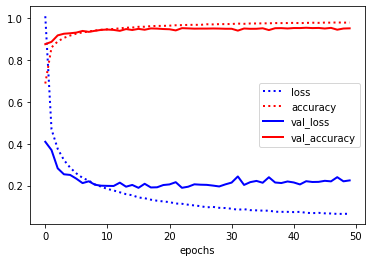

In [21]:
def build_model_2_1():
    learning_rate = 0.001
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='selu', padding='same', input_shape=(32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='selu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='selu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='selu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='selu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='selu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='selu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, train=True, epochs=epochs, batch_size=64)
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, train=False)

answer_q_2_1 = """
Dropout and MaxPooling2D layers were added to avoid overfitting on the training set gradually increasing the amount of dropout, 
to force layers deep in the model to regularize more than layers closer to the input.
                
Zero-padding on the convolutional layers is used to be able to build a deeper model.
Best validation accuracy achieved was of 0.954,
making the convolutional model superior to the model with only Dense layers,
for the digit images recognition problem.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)
'''

train_datagen = ImageDataGenerator(
      rotation_range=15,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.15,
      zoom_range=0.15,
      horizontal_flip=False, #gets very bad results (probably no flipped images)
      fill_mode='nearest')

augmented_split = train_datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=64), preprocessed_split[1], preprocessed_split[3]

Loading model from file
Success!
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_136 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_137 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)  

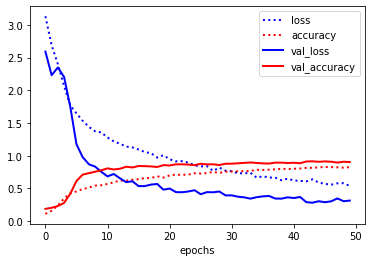

In [45]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented data

#run_evaluation("model_2_2", build_model_2_1, data=augmented_split, base_dir=base_dir, train=True, generator = True, epochs=epochs, batch_size=64)
run_evaluation("model_2_2", build_model_2_1, data=augmented_split, base_dir=base_dir, train=False, generator = True)

answer_q_2_2 = """
Data Augmentation did not improve the performance of the model. 
It decreased the maximum validation accuracy from 0.954 to 0.915.
In special, doing horizontal flips really deteriorates the model,
since for example a 6 could turn into a 9,
so probably the dataset does not contain upside down images. 
               
However, the data augmentation improves results for the validation set, 
when in comparissom with the training set.
This makes a valid reason to use this model in place of the previous one.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [24]:
digit_classes = {0:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9,9:0}

model = load_model_from_file(base_dir, "model_2_2", extension='.h5') 

X_test_gray = normalize_image(rgb2gray(X_test))
y_pred = model.predict(X_test_gray)
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

# What is the accuracy of model_2_2 on the test data?
test_accuracy_3_1 = 1 - len(misclassified_samples)/len(X_test_gray)
print("Accuracy of model_2_2: {}".format(round(test_accuracy_3_1,3)))

Accuracy of model_2_2: 0.903


In [42]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix():
    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(list(digit_classes.values()), rotation=45, ha="right")
    ax.set_yticklabels(list(digit_classes.values()))
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
        
def plot_misclassifications():
    digit = 3

    y_test_list = []
    for i in range(len(y_test)):
        y_test_list.append(digit_classes[np.argmax(y_test[i])] == digit)

    y_test_digit = y_test[y_test_list]
    X_test_digit = X_test_gray[y_test_list]

    y_pred_digit = model.predict(X_test_digit)
    misclassified_samples_digit = np.nonzero(np.argmax(y_test_digit, axis=1) != np.argmax(y_pred_digit, axis=1))[0]

    # Visualize the (first 10) misclassifications, together with the predicted and actual class
    fig, axes = plt.subplots(1, 10,  figsize=(20, 10))
    for nr, i in enumerate(misclassified_samples_digit[:10]):
        axes[nr].imshow(X_test_digit[i])
        axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (digit_classes[np.argmax(y_pred_digit[i])],digit_classes[np.argmax(y_test_digit[i])]))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())

    plt.show()

answer_q_3_1 = """Accuracy for model_2_2 is 0.903.
From the confusion matrix it is possible to see that the most misclassified digits are:
8, 5 and 1 predicted as 3 and 1 as 7. 
This indicates that some extra '3' samples could benefit the model.

Since 3 was the wrong prediction more often than other digits, it was ingestigated further.
Misclassifications could be eg. due to lack of resolution of the (noisy/blurry) image,
or missing parts of the digit, which makes it look like a 5, for example.
"""

print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 481 characters long


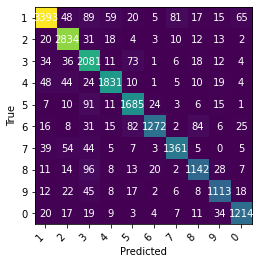

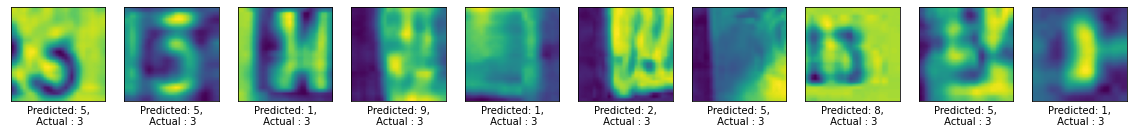

In [40]:
plot_confusion_matrix()
plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [27]:
img_tensor = X_test_gray[0]
img_tensor = np.expand_dims(img_tensor, axis=0) 

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:15]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

images_per_row = 16

layer_names = []
for layer in model.layers[:15]:
    layer_names.append(layer.name)

def plot_activations_aux(layer_index, activations):
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

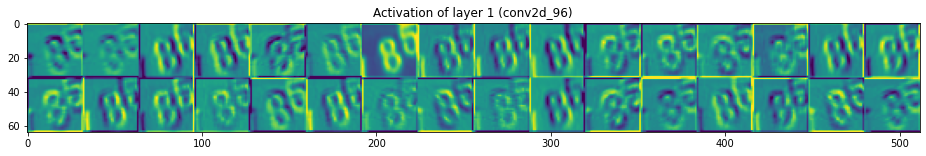

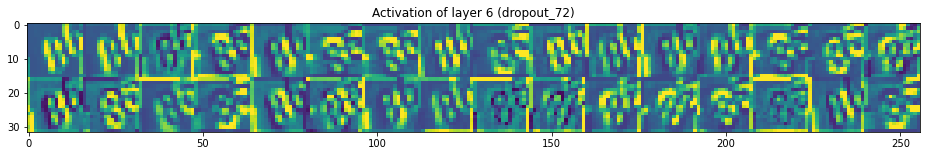

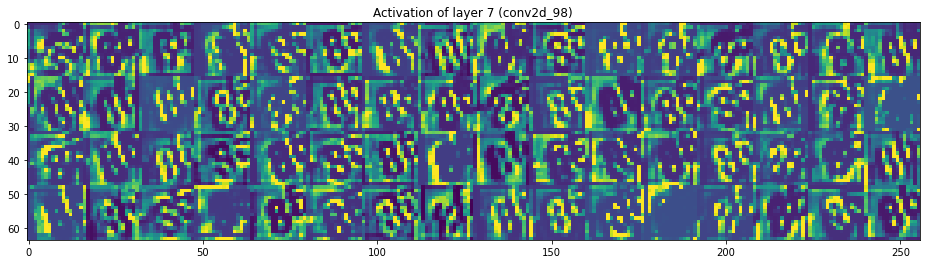

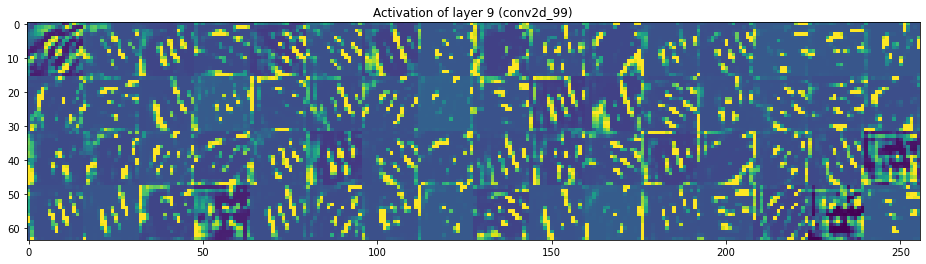

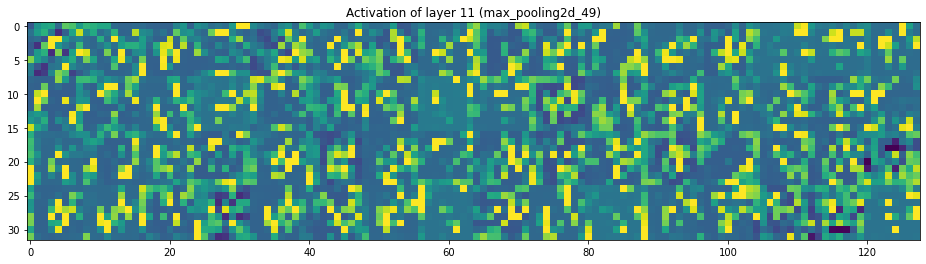

Answer is 451 characters long


In [28]:
def plot_activations():
    for layer in [0,5,6,8,10]: #range(len(model.layers)):
        plot_activations_aux(layer, activations)

plot_activations()
answer_q_3_2 = """
The first convolutional layer has some very interesting activations,
such as one that can reall distinguish the digit from its background.
Similarly, the following activation layers, have some interesting features until the 9th layer,
where it is very abstract, but clear to see the diagonal filters, 
quite helpful specially in this case where the image is slightly tilted.
From the 11th on, the pixelation makes it harder to interpret the filters.
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing the learned embeddings with tSNE (4 points)

Extract the learned embeddings of the images from X_train using your `model_2_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings of the training set based on the  Convolutional part of `model_2_2` (e.g VGG16 generates 512-sized embeddings)
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for VGG16 this will mean `original_array` of  size (num_images, 512) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true binary labels. Please note that this may take a while to compute the tSNE embeddings.
- Interpret the results from the map in `answer_q_2_3`

In [29]:
from sklearn.manifold import TSNE
#from keras.layers import Input, Embedding, Dot, Reshape, Dense
#from keras.models import Model

def create_embeddings(model_file, preprocessed_split):
    """ Returns the image embeddings of X_train learned in the given model
    Source: 
    https://github.com/WillKoehrsen/wikipedia-data-science/blob/master/notebooks/Book%20Recommendation%20System.ipynb
    https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
    https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
    https://www.kaggle.com/colinmorris/visualizing-embeddings-with-t-sne
    """
    #embedding_size = 50
    #images = Input(name = 'images', shape = [32, 32, 3])
    #model = tf.keras.Sequential()
    #model.add(load_model_from_file(base_dir, model_file, extension='.h5'))
    #model.add(Embedding(name = 'embedding_layer', input_dim = len(X_train), output_dim = embedding_size))
    #dn_embs = model.get_layer('embedding_layer').get_weights()[0]
    #return dn_embs
    model = load_model_from_file(base_dir, model_file, extension='.h5') 
    
    return model.predict(preprocessed_split[0])

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by T-distributed Stochastic Neighbor Embedding (TSNE)
    """
    original_array = original_array.reshape(len(original_array),-1)
    d2_embs = TSNE(n_components=2, init="pca", learning_rate="auto", random_state=1, n_jobs=-1).fit_transform(original_array)
    
    return d2_embs

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_2_2", preprocessed_split)
d2_embs = compute_tsne(dn_embs)

D:\Programs\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Answer is 482 characters long


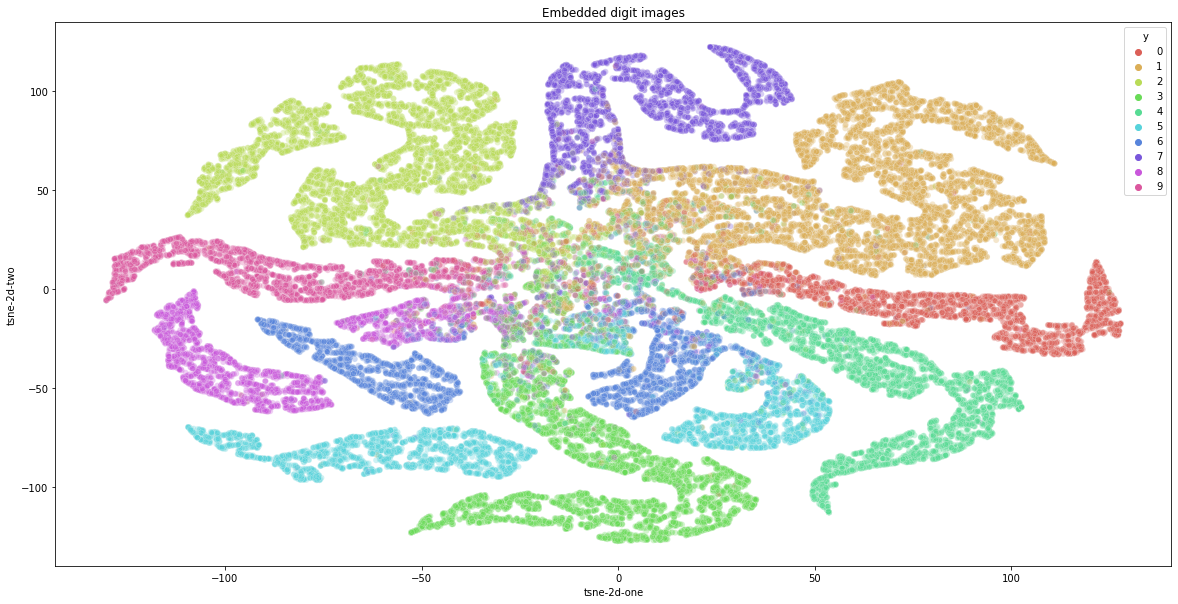

In [30]:
import seaborn as sns

def plot_tsne_aux(y_train):
    y_train_list = []
    for i in range(len(y_train)):
        y_train_list.append(digit_classes[np.argmax(y_train[i])])
    return y_train_list 
        
def plot_tsne(tsne_embeds, labels):
    df = pd.DataFrame(tsne_embeds, columns=['tsne-2d-one','tsne-2d-two'])
    df['y'] = plot_tsne_aux(labels)

    plt.figure(figsize=(20,10))
    plt.title('Embedded digit images')
    sns.scatterplot(
        x=df['tsne-2d-one'], y=df['tsne-2d-two'],
        hue=df['y'],
        palette=sns.color_palette("hls", 10),
        data=X_train,
        legend="full",
        alpha=0.3
    )

plot_tsne(d2_embs, y_train)

answer_q_2_3 = """        
               It seems that the T-distributed Stochastic Neighbor Embedding (TSNE) was very effective on the Street View House Numbers Dataset.
               The dimensionality reduction to the 2 dimensions (tsne-2d-one and tsne-2d-two) was able to cluster most of the digits.
               
               However, the center of the scatterplot contains very mixed digits. 
               These are probably due the noisy images that are misclassified. 
               """
print("Answer is {} characters long".format(len(answer_q_2_3)))

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base.
- You can also add any kind of regularization.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.evaluation_split

Loading model from file
Success!
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_36 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 64)                32832     
_________________________________________________________________
batch_normalization_164 (Bat (None, 64)                256       
_________________________________________________________________
dropout_97 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 10)                650       
Total params: 14,748,426
Trainable params: 33,610
Non-trainable params: 14,714,816
___

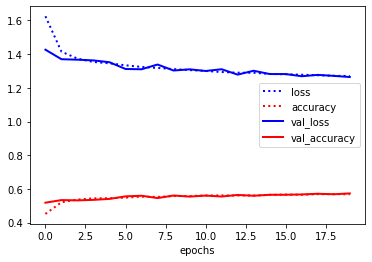

In [37]:
from tensorflow.keras.applications import VGG16

def build_model_4_1():
    learning_rate = 0.001
    
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3), classes=10)
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='selu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Freezing convolutional base 
    conv_base.trainable = False
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

#run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train=True, epochs=20, batch_size=64)
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train=False, epochs=20, batch_size=64)

answer_q_4_1 = """
The imported VGG16 model underperforms the Convolutional model trained in the Street View House Numbers Dataset.
Unlike the other models, only 20 epochs were used (which seems to be enough), since this model takes a very long time to be trained.                
The model does not seem to overfit, but the best validation accuracy achieved was only 0.573. 

However, it can be greatly improved by unfreezing of the last convolutional layers,
as the results can be seen in the next question.
"""

print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Optimizing transfer (5 points)

Perform the same transfer learning as in `Question 4.1`, but try to improve the performance.

- Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Consider other models to transfer from. For a comparison between different architectures, see [this link](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d), or choose one of the available architectures from [Keras Applications](https://keras.io/api/applications/). 
- Keep in mind that bigger models don't always perform better, some don't work on small images. Also try to use models that do
not take more than 100MB of storage.
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_2'.


Loading model from file
Success!
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_47 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_168 (Dense)            (None, 64)                32832     
_________________________________________________________________
batch_normalization_175 (Bat (None, 64)                256       
_________________________________________________________________
dropout_108 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_169 (Dense)            (None, 10)                650       
Total params: 14,748,426
Trainable params: 13,012,810
Non-trainable params: 1,735,616


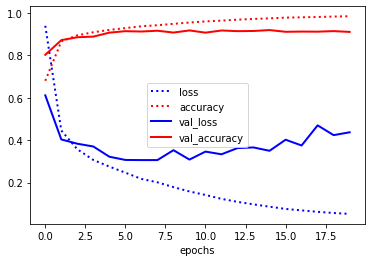

In [36]:
# Load pre-trained model, can be other than VGG16
# Other applications tried and their maximum validation accuracy with frozen convolutional layers:
#from tensorflow.keras.applications import ResNet50 #0.302
#from tensorflow.keras.applications import ResNet152V2 #0.464
#from tensorflow.keras.applications import ResNet101V2 #0.470
#from tensorflow.keras.applications import VGG19 #0.550
#from tensorflow.keras.applications import DenseNet201 #0.597
#from tensorflow.keras.applications import DenseNet121 #0.601
#from tensorflow.keras.applications import DenseNet169 #0.606, 31,32 frozen:0 .698
#from tensorflow.keras.applications import VGG16 #Completely frozen: 0.570, unfrozen 5: 0.8342, unfrozen 4,5: 0.922, 0.921

# Other models had requirements that could not be met due to the input format:
#from tensorflow.keras.applications import NASNetLarge #When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (331, 331, 3)
#from tensorflow.keras.applications import NASNetMobile #When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (224, 224, 3)
#from tensorflow.keras.applications import InceptionResNetV2 #Input size must be at least 75x75
#from tensorflow.keras.applications import Xception #Input size must be at least 75x75
#from tensorflow.keras.applications import InceptionV3 #Input size must be at least 75x75

def build_model_4_2():
    ''' VGG16 model with the last layers of the model unfrozen for better accuracy.
    '''
    learning_rate = 0.001
    
    conv_base = VGG16(input_shape=(32, 32, 3), include_top=False, weights="imagenet", classes=10)
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='selu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Unreezing convolutional base
    conv_base.trainable = True

    # Training only layers in the last convolutional block
    set_trainable = False

    for layer in conv_base.layers:
        if layer.name == 'block4_conv1':
            set_trainable = True
        if layer.name == 'block4_conv2':
            set_trainable = True
        if layer.name == 'block4_conv3':
            set_trainable = True
        if layer.name == 'block5_conv1':
            set_trainable = True
        if layer.name == 'block5_conv2':
            set_trainable = True
        if layer.name == 'block5_conv3':
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

#run_evaluation("model_4_2", build_model_4_2, evaluation_split, base_dir, train=True, epochs=20, batch_size=64)
run_evaluation("model_4_2", build_model_4_2, evaluation_split, base_dir, train=False, epochs=20, batch_size=64)

answer_q_4_2 = """
We tested other pretrained models from keras keeping the convolutional base frozen, for comparissom.
The best 3 were the DenseNets (201,121,196), they had very close performance, with DenseNet169 being the overall best.
Then, unfreezing the last 4 convolutional layers from blocks 31 and 32,
the performance was improved from 0.606 to 0.698 (saved as model_DenseNet169).

The overall best was VGG16 with the last blocks 4 and 5 unfrozen, with accuracy of 0.920, 
even though it seems to start overfiting with more epochs.
"""

print("Answer is {} characters long".format(len(answer_q_4_2)))